In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
tf.get_logger().setLevel("ERROR")

In [3]:
from keras.models import load_model
### Load saved model 
model2 = load_model("asl.h5")
model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 139,717,734 (532.98 MB)

 Trainable params: 119,693,348 (456.59 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 2 (12.00 B)

In [3]:
import cv2 

key = cv2.waitKey(1)
webcam = cv2.VideoCapture(0)
region_top = 20
region_bottom = 314
region_left = 10
region_right = 314
import numpy as np
while True:
    try:
        check, frame = webcam.read()
        # print(check) #prints true as long as the webcam is running
        # print(frame) #prints matrix values of each framecd 
        cv2.rectangle(frame, (region_left, region_top), (region_right, region_bottom), (0,0,0), 2)
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('q'): 
            region = frame[region_top:region_bottom, region_left:region_right]
            cv2.imwrite(filename='saved_img.jpg', img=region)
            webcam.release()
            img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
            print("Converting RGB image to grayscale...")
            gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(filename='saved_img3.jpg', img=gray)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            break

        
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

Converting RGB image to grayscale...


In [4]:
from rembg import remove 
from PIL import Image 

In [5]:
input = Image.open("saved_img.jpg")
output = remove(input) 
output.save("saved_img2.jpg", "PNG")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
The predicted label for the input image is: z


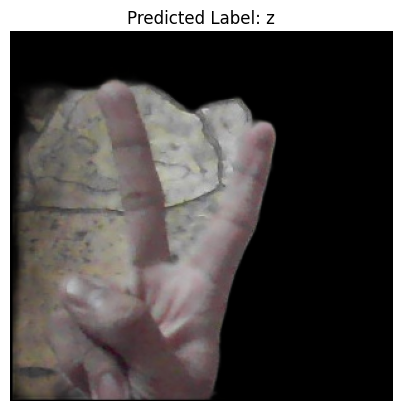

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

class_labels = '0123456789abcdefghijklmnopqrstuvwxyz'

def preprocess_image(image_path):
    # img = load_img(image_path, target_size=(224,224))
    img_ = cv2.imread(image_path, cv2.IMREAD_ANYCOLOR)
    img_ = cv2.resize(img_, (224,224))
    img_array = img_to_array(img_)
    img_array = np.expand_dims(img_array, axis=0)  
    return img_array

def classify_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model2.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]  
    return predicted_label
image_path = 'saved_img.jpg'  
predicted_label = classify_image(image_path)
print(f'The predicted label for the input image is: {predicted_label}')
img = load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()



In [7]:
import pyttsx3
engine = pyttsx3.init()
#used to set speed
engine.setProperty("rate", 100)  
engine.say(predicted_label)  
engine.runAndWait()

In [8]:
import speech_recognition as sr
from pynput import keyboard
def on_press(key):
    if key == keyboard.KeyCode.from_char('q'):
        return False  # Stop listener

def speech_to_text():
    r = sr.Recognizer()
    
    print("Start speaking. Press 'q' to quit.")
    
    with keyboard.Listener(on_press=on_press) as listener:
        while listener.running:
            with sr.Microphone() as source:
                print("Listening...")
                audio = r.listen(source)
                
                try:
                    text = r.recognize_google(audio)
                    print("You said:", text)
                    lists = list(text)
                    print(lists)
                except sr.UnknownValueError:
                    print("Could not understand audio")
                except sr.RequestError as e:
                    print("Could not request results; {0}".format(e))
    return lists                

lists=speech_to_text()


Start speaking. Press 'q' to quit.
Listening...
Could not request results; recognition connection failed: [Errno 11001] getaddrinfo failed


UnboundLocalError: cannot access local variable 'lists' where it is not associated with a value

In [30]:
lists = ['Q']

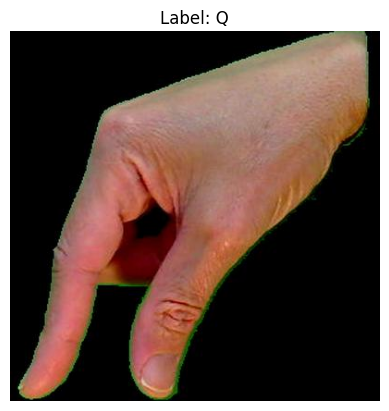

In [31]:
import os
import matplotlib.pyplot as plt
for a in lists:
    folderPath = os.path.join("asl_dataset",a)
    for j in os.listdir(folderPath):
        img_path = os.path.join(folderPath,j)
        img = load_img(img_path)
        plt.imshow(img)

        plt.title(f'Label: {a}')
        plt.axis('off')
        plt.show()
        break

In [8]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import time
from rembg import remove 
from PIL import Image 


# Initialize webcam
webcam = cv2.VideoCapture(0)
region_top =40 
region_bottom = 314
region_left = 10
region_right = 314

# Load your pre-trained model
# Make sure to load your actual trained model here
model2 = load_model("asl.h5")
# Define class labels
class_labels = '0123456789abcdefghijklmnopqrstuvwxyz'


# Preprocess image for model prediction
def preprocess_image(image_path):
    img_ = cv2.imread(image_path, cv2.IMREAD_ANYCOLOR)
    img_ = cv2.resize(img_, (224,224))  # Resize to match model's input shape
    img_array = img_to_array(img_)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Classify image and get predicted label
def classify_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model2.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]  
    return predicted_label

# Initialize time for label updates
last_pred_time = time.time()
predicted_label = ''
predicted_label2 = ''

while True:
    try:
        check, frame = webcam.read()
        
        if not check:
            break
        
        # Define the region of interest (ROI) and draw rectangle
        cv2.rectangle(frame, (region_left, region_top), (region_right, region_bottom), (0, 0, 0), 2)

        # Capture the region of interest (ROI)
        region = frame[region_top:region_bottom, region_left:region_right]
        
        if time.time() - last_pred_time >= 5:
            cv2.imwrite(filename='saved_img.jpg', img=region)
            input = Image.open("saved_img.jpg")
            output = remove(input) 
            output.save("saved_img2.png", "PNG")
            # predicted_label = classify_image('saved_img.jpg')
            predicted_label2 = classify_image('saved_img2.png')
            last_pred_time = time.time()
        
        # Display the predicted label on the frame
        cv2.putText(frame, f'Predicted Label: {predicted_label2}', 
                    (region_left, region_top - 5), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        # cv2.putText(frame, f'Predicted Label: {predicted_label2}', 
        #             (region_right-50, region_top - 5), 
        #             cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        # # Show the frame with prediction
        cv2.imshow("Capturing", frame)

        key = cv2.waitKey(1)
        if key == ord('q'):
            break

    except(KeyboardInterrupt):
        print("Turning off camera.")
        break

webcam.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
